# Capstone Project - Big Data Deep Learning
## TEC-VIII Programa de Especialización en Big Data Analytics aplicada a los Negocios

---

### 📋 Información del Proyecto

| Campo | Información |
|-------|-------------|
| **Nombres de los integrantes del grupo** | John Samuel Valdivia Delgado|
| **Título del Proyecto** | Optimización del Proceso Comercial mediante la Predicción de Probabilidad de Cierre usando Machine Learning   |
| **Fecha de Entrega** | 16/02/2026 |

---

## 📑 Índice

1. [Resumen Ejecutivo](#1-resumen-ejecutivo)
2. [Configuración del Entorno](#2-configuración-del-entorno)
3. [Definición del Problema de Negocio](#3-definición-del-problema-de-negocio)
4. [Carga y Exploración de Datos](#4-carga-y-exploración-de-datos)
5. [Preprocesamiento de Datos](#5-preprocesamiento-de-datos)
6. [Diseño y Arquitectura del Modelo](#6-diseño-y-arquitectura-del-modelo)
7. [Entrenamiento del Modelo](#7-entrenamiento-del-modelo)
8. [Evaluación y Métricas](#8-evaluación-y-métricas)
9. [Interpretación de Resultados](#9-interpretación-de-resultados)
10. [Conclusiones y Recomendaciones de Negocio](#10-conclusiones-y-recomendaciones-de-negocio)
11. [Referencias](#11-referencias)

---
## 1. Resumen Ejecutivo

**Instrucciones:** Proporcione un resumen conciso (máximo 300 palabras) que incluya:
- Problema de negocio abordado
- Metodología utilizada
- Principales hallazgos
- Impacto esperado en el negocio

---

*[Escriba su resumen ejecutivo aquí]*





---

## 2. Configuración del Entorno

### 2.1 Verificación de GPU (Recomendado para Deep Learning)

In [38]:
# Verificar si hay GPU disponible
import torch

# Verificar disponibilidad de GPU
if torch.cuda.is_available():
    print(f"✅ GPU disponible: {torch.cuda.get_device_name(0)}")
    print(f"   Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    device = torch.device('cuda')
else:
    print("⚠️ GPU no disponible. Usando CPU.")
    print("   Recomendación: En Colab, vaya a Runtime > Change runtime type > GPU")
    device = torch.device('cpu')

print(f"\nDispositivo seleccionado: {device}")

✅ GPU disponible: Tesla T4
   Memoria GPU: 15.64 GB

Dispositivo seleccionado: cuda


### 2.2 Instalación de Librerías Adicionales (si es necesario)

In [39]:
# Descomente e instale las librerías adicionales que necesite
# !pip install transformers
# !pip install pytorch-lightning
# !pip install optuna
# !pip install shap
# !pip install lime

### 2.3 Importación de Librerías

In [40]:
# =====================================================
# LIBRERÍAS FUNDAMENTALES
# =====================================================

# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Deep Learning - TensorFlow/Keras (alternativa)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score)

# Utilidades
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("✅ Todas las librerías importadas correctamente")
print(f"   PyTorch version: {torch.__version__}")
print(f"   TensorFlow version: {tf.__version__}")

✅ Todas las librerías importadas correctamente
   PyTorch version: 2.9.0+cu128
   TensorFlow version: 2.19.0


### 2.4 Conexión con Google Drive (para cargar datos)

In [41]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base de su proyecto
# Modifique esta ruta según la ubicación de sus datos
BASE_PATH = '/content/drive/MyDrive/Proyecto/'

print(f" Google Drive montado")
print(f"   Ruta base del proyecto: {BASE_PATH}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Google Drive montado
   Ruta base del proyecto: /content/drive/MyDrive/Proyecto/


---
## 3. Definición del Problema de Negocio

### 3.1 Contexto del Negocio

**Instrucciones:** Describa el contexto empresarial, incluyendo:
- Sector Seguros
- MAPFRE Seguros – Compañía Multinacional del sector seguros con operaciones en el mercado peruano.
-En el área comercial se reciben diariamente múltiples leads interesados en la adquisición de seguros (vehiculares, vida, salud, entre otros).

Cada lead contiene información relevante como:

- Tipo de seguro solicitado

- Fecha y hora de ingreso

- Canal de captación

- Agente asignado

- Edad del prospecto

- Dirección y ubigeo

- Nivel de endeudamiento (Equifax)

- Estado del lead (cerrado / pendiente / no cerrado)

Actualmente, todos los leads son gestionados bajo criterios operativos tradicionales, sin un sistema de priorización basado en datos. Esto genera:

- Asignación poco eficiente de recursos comerciales

- Baja tasa de conversión

- Pérdida de oportunidades de alto valor

La empresa cuenta con datos históricos de leads cerrados y no cerrados, lo cual permite desarrollar un modelo predictivo que estime la probabilidad de cierre de cada nuevo lead.

---

### 3.2 Problema a Resolver

**Instrucciones:** Defina claramente:
- ¿Cuál es el problema específico?
La empresa presenta una baja tasa de conversión de leads debido a la ausencia de un sistema de priorización comercial basado en probabilidad de cierre.

Actualmente, los agentes comerciales atienden leads sin un criterio predictivo que permita identificar cuáles tienen mayor probabilidad de convertirse en venta.
- ¿Por qué es importante resolverlo?

. El tiempo de los agentes es limitado.

. No todos los leads tienen la misma probabilidad de conversión.

. La priorización adecuada puede incrementar ingresos sin aumentar costos operativos.
- ¿Cuál es el impacto actual del problema?
.Baja eficiencia comercial

.Uso ineficiente del tiempo de los agentes

.Oportunidades de venta desaprovechadas

.Menor rentabilidad por lead generado

.Menor retorno sobre inversión en marketing


---

### 3.3 Objetivos del Proyecto

**Instrucciones:** Liste los objetivos SMART (Específicos, Medibles, Alcanzables, Relevantes, Temporales)

---

**Objetivo General:**
 Desarrollar e implementar un modelo de Machine Learning que estime la probabilidad de cierre de venta de cada lead, con el fin de optimizar la priorización comercial y aumentar la tasa de conversión en un período de 6 meses.

**Objetivos Específicos:**
1. Diseñar un sistema de scoring comercial que permita segmentar los leads en alta, media y baja probabilidad de cierre antes del mes 4.
2. Incrementar la tasa de conversión comercial en al menos un 10% en los 6 meses posteriores a la implementación del modelo.
3. *[Completar]*

---

### 3.4 Tipo de Problema de Machine Learning

**Instrucciones:** Identifique el tipo de problema:
- [X] Clasificación binaria
- [ ] Clasificación multiclase
- [ ] Regresión
- [ ] Clustering
- [ ] Series temporales
- [ ] Otro: _________

**Justificación:**

El objetivo del proyecto es predecir si un lead cerrará o no una venta.
El modelo permitirá:

1 Calcular la probabilidad de cierre (lead scoring)

2 Priorizar leads de mayor probabilidad

3 Optimizar la asignación de recursos comerciales

---

---
## 4. Carga y Exploración de Datos

### 4.1 Carga de Datos

In [42]:
# =====================================================
# CARGA DE DATOS
# =====================================================

# Opción 1: Cargar desde Google Drive
df = pd.read_csv('/content/drive/MyDrive/Proyecto/Export.csv')

# Opción 2: Cargar desde URL
# df = pd.read_csv('https://url-de-sus-datos.com/datos.csv')

# Opción 3: Cargar desde archivo local (subido a Colab)
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('nombre_archivo.csv')

# Opción 4: Dataset de ejemplo (para testing)
# from sklearn.datasets import load_iris, load_boston, fetch_california_housing
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# =====================================================
# COMPLETE AQUÍ: Cargue su dataset
# =====================================================

# df = pd.read_csv('...')  # Descomente y complete

print(f" Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")

 Dataset cargado exitosamente
   Dimensiones: 37,302 filas × 40 columnas


### 4.2 Descripción del Dataset

**Instrucciones:** Describa su dataset:
- Fuente de los datos
- Período de tiempo que cubren
- Descripción de cada variable

---

| Variable | Tipo | Descripción |
|----------|------|-------------|
| variable_1 | numérica/categórica | [Descripción] |
| variable_2 | numérica/categórica | [Descripción] |
| ... | ... | ... |
| target | numérica/categórica | [Variable objetivo] |

---

### 4.3 Exploración Inicial de Datos (EDA)

In [43]:
# =====================================================
# INFORMACIÓN GENERAL DEL DATASET
# =====================================================

print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)

# Primeras filas
print("\n📊 Primeras 5 filas:")
display(df.head())

# Información del dataset
print("\n📋 Información del Dataset:")
print(df.info())

# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
display(df.describe())

INFORMACIÓN GENERAL DEL DATASET

📊 Primeras 5 filas:


,REFERIDOID,ID,ESTADO,FECHA_REGISTRO,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,EMAIL,NOMBRE,APELLIDO,EMPRESA,...,FCH_SEGUIMIENTO,FCH_SEGUIMIENTO_FIN,FECHA_PRIMER_CONTACTO,DIFERENCIA_PRIMER_CONTACTO,DIF_CAL_PRIMER_CONTACTO,BANCARIZADO,CALIFICACION,EQUIFAX_DEUDA_TOTAL,EQUIFAX_EDAD,LEGAL
0,18395824,18395824.0,ACTIVO,31/07/2025 23:56:11,RUC,20607085642,CESAR_PASTUS@GMAIL.COM,AGROESTRUCTURAS EMPRESA INDIVIDUAL DE RESPONSA...,AGROESTRUCTURAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,ND,NaN,NaN,NaN
1,18395823,14108923.0,ACTIVO,31/07/2025 23:55:37,DNI,80614524,luisrrafaelo@gmail.com,Rafaelo Rojas Luis,Rojas Rojas,NaN,...,NaN,NaN,NaN,NaN,NaN,SI,ND,0.00,46.0,Si
2,18395822,14108922.0,ACTIVO,31/07/2025 23:55:37,DNI,80614524,luisrrafaelo@gmail.com,Rafaelo Rojas Luis,Rojas Rojas,NaN,...,NaN,NaN,NaN,NaN,NaN,SI,ND,0.00,46.0,Si
3,18395821,18395821.0,ACTIVO,31/07/2025 23:50:37,DNI,75376541,maricarmen.bustamante1245@gmail.com,MARICARMEN,BUSTAMANTE OCAÑA,NaN,...,04/08/2025 18:08:00,04/08/2025 18:08:00,01/08/2025 00:05:03,0D 0H:0M:0S,0:14:24,SI,NORMAL,1945.48,27.0,NaN
4,18395820,18395820.0,ACTIVO,31/07/2025 23:49:00,DNI,72329959,julissa_005@hotmail.com,ROSARIO DEL PILAR,CORNEJO HERENCIA,NaN,...,04/08/2025 18:08:00,04/08/2025 18:08:00,01/08/2025 00:04:08,0D 0H:0M:0S,0:14:24,SI,NORMAL,20001.80,33.0,NaN



📋 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37302 entries, 0 to 37301
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   REFERIDOID                  37302 non-null  int64  
 1   ID                          37301 non-null  float64
 2   ESTADO                      37302 non-null  object 
 3   FECHA_REGISTRO              37302 non-null  object 
 4   TIPO_DOCUMENTO              37302 non-null  object 
 5   NUMERO_DOCUMENTO            37302 non-null  object 
 6   EMAIL                       36519 non-null  object 
 7   NOMBRE                      37273 non-null  object 
 8   APELLIDO                    37302 non-null  object 
 9   EMPRESA                     1847 non-null   object 
 10  TELEFONO                    36740 non-null  object 
 11  CELULAR                     11155 non-null  object 
 12  EDAD                        12913 non-null  float64
 13  SEX

,REFERIDOID,ID,EDAD,EQUIFAX_DEUDA_TOTAL,EQUIFAX_EDAD
count,3.730200e+04,3.730100e+04,12913.000000,2.206500e+04,22065.000000
mean,1.837656e+07,1.608500e+07,11.394022,3.452085e+04,42.679311
std,8.767986e+04,2.138519e+06,21.607647,1.458850e+05,13.597033
min,1.577676e+06,1.407082e+07,0.000000,0.000000e+00,18.000000
25%,1.836784e+07,1.408796e+07,0.000000,0.000000e+00,32.000000
50%,1.837716e+07,1.410497e+07,0.000000,2.112070e+03,41.000000
75%,1.838649e+07,1.837380e+07,0.000000,2.126767e+04,52.000000
max,1.839582e+07,1.839582e+07,125.000000,1.402116e+07,125.000000


ANÁLISIS DE VALORES FALTANTES

⚠️ Variables con valores faltantes:


,Total Faltantes,Porcentaje (%)
EMPRESA,35455,95.05
COMENTARIO,34302,91.96
FCH_SEGUIMIENTO,32711,87.69
FCH_SEGUIMIENTO_FIN,32711,87.69
MOTIVO_NO_CIERRE_VENTA,31140,83.48
FECHA_VENTA,28227,75.67
FECHA_VENTA_TRON,28227,75.67
CELULAR,26147,70.10
EDAD,24389,65.38
OBSERVACIONES,24379,65.36


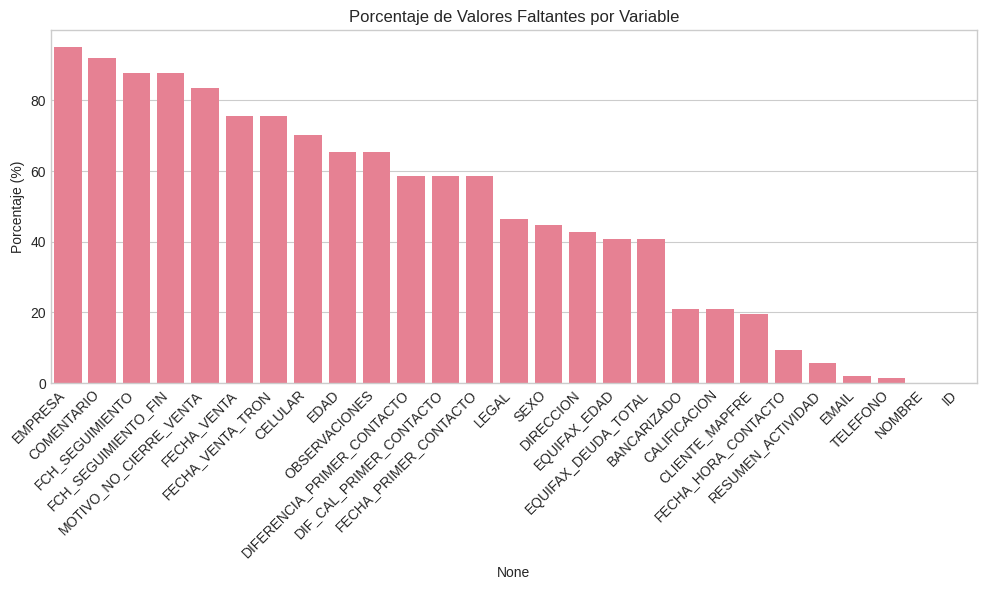

In [44]:
# =====================================================
# ANÁLISIS DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 60)

# Calcular valores faltantes
missing_data = pd.DataFrame({
    'Total Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Total Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Variables con valores faltantes:")
    display(missing_data)

    # Visualización de valores faltantes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y='Porcentaje (%)', data=missing_data)
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No hay valores faltantes en el dataset")

ANÁLISIS DE LA VARIABLE OBJETIVO: CIERRE_VENTA

📊 Distribución de clases:
CIERRE_VENTA
Pendiente     17096
Si             9030
No             6207
En proceso     4969
Name: count, dtype: int64


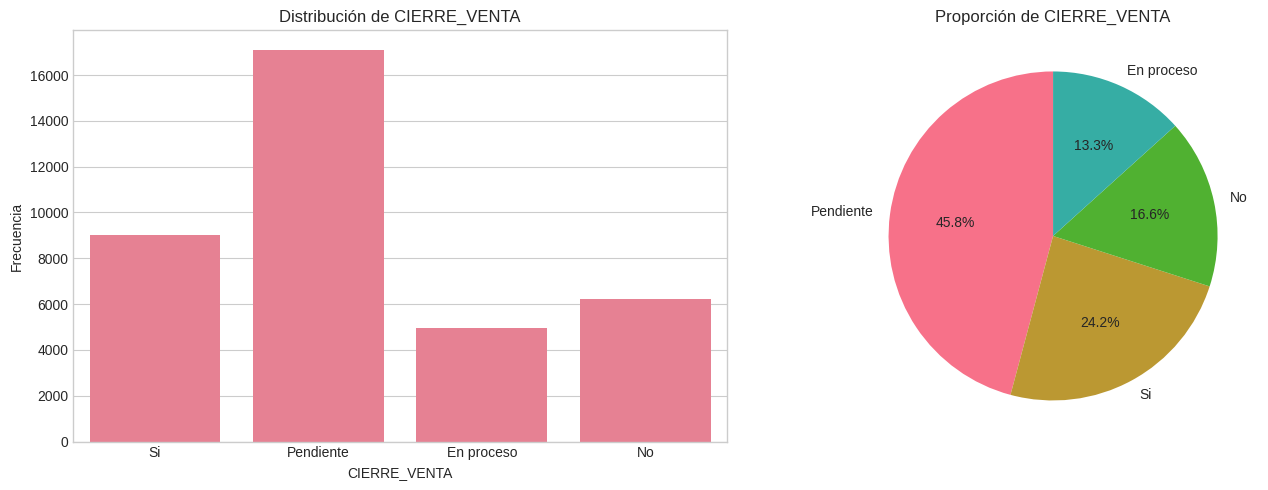


⚠️ ADVERTENCIA: Dataset desbalanceado (ratio 3.44:1)
   Considere técnicas de balanceo: SMOTE, undersampling, class weights


In [45]:
# =====================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO
# =====================================================

# COMPLETE: Especifique el nombre de su variable objetivo
TARGET_COLUMN = 'CIERRE_VENTA'  # Cambie 'target' por el nombre de su variable objetivo

print("=" * 60)
print(f"ANÁLISIS DE LA VARIABLE OBJETIVO: {TARGET_COLUMN}")
print("=" * 60)

# Para clasificación
if df[TARGET_COLUMN].dtype == 'object' or df[TARGET_COLUMN].nunique() < 20:
    print("\n📊 Distribución de clases:")
    class_dist = df[TARGET_COLUMN].value_counts()
    print(class_dist)

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de barras
    sns.countplot(data=df, x=TARGET_COLUMN, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')
    axes[0].set_xlabel(TARGET_COLUMN)
    axes[0].set_ylabel('Frecuencia')

    # Gráfico de pastel
    axes[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Proporción de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

    # Verificar desbalance
    imbalance_ratio = class_dist.max() / class_dist.min()
    if imbalance_ratio > 3:
        print(f"\n⚠️ ADVERTENCIA: Dataset desbalanceado (ratio {imbalance_ratio:.2f}:1)")
        print("   Considere técnicas de balanceo: SMOTE, undersampling, class weights")
else:
    # Para regresión
    print("\n📊 Estadísticas de la variable objetivo:")
    print(df[TARGET_COLUMN].describe())

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    sns.histplot(df[TARGET_COLUMN], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')

    # Box plot
    sns.boxplot(y=df[TARGET_COLUMN], ax=axes[1])
    axes[1].set_title(f'Box Plot de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

MATRIZ DE CORRELACIONES


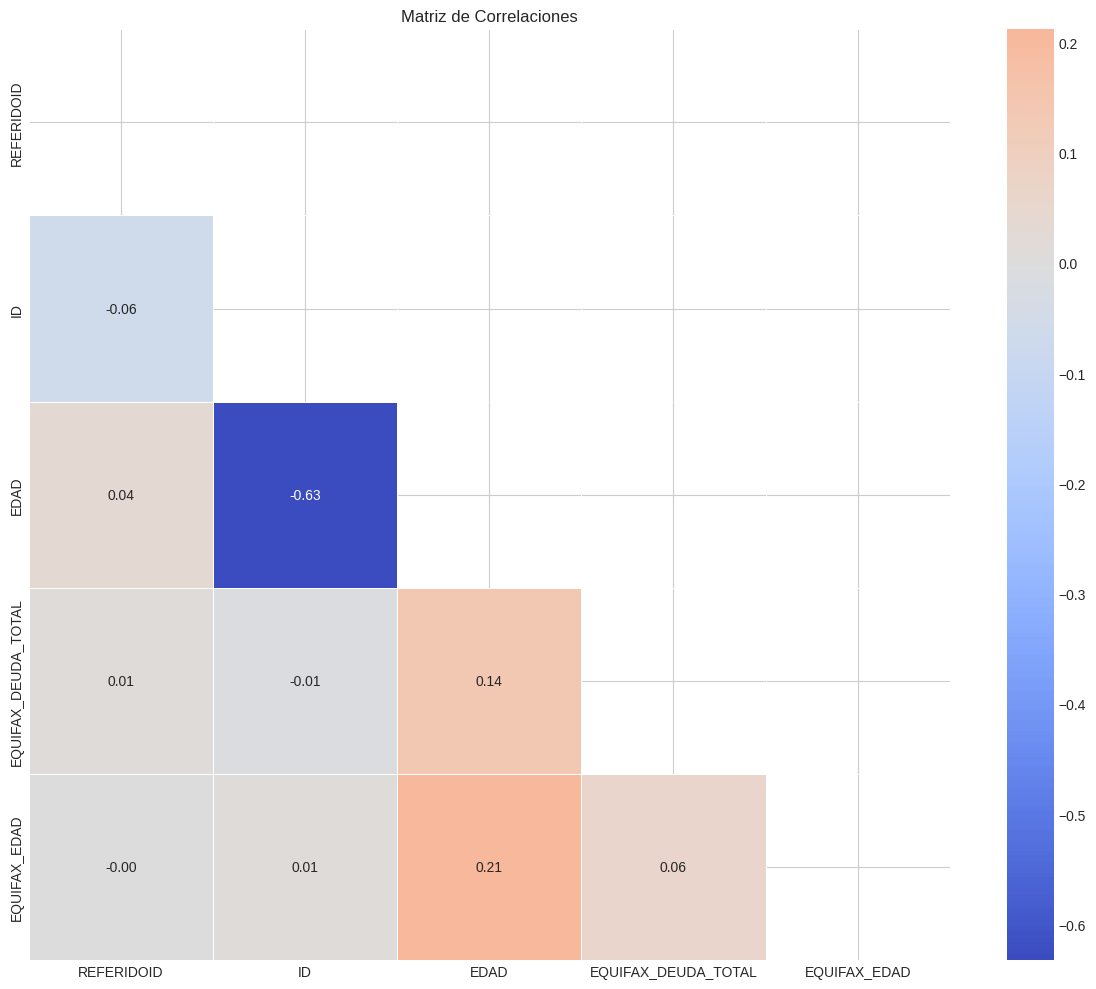

In [46]:
# =====================================================
# ANÁLISIS DE CORRELACIONES
# =====================================================

print("=" * 60)
print("MATRIZ DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Calcular correlaciones
    correlation_matrix = df[numeric_cols].corr()

    # Visualización
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    # Correlaciones con la variable objetivo
    if TARGET_COLUMN in numeric_cols:
        print(f"\n📊 Correlaciones con {TARGET_COLUMN}:")
        target_corr = correlation_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False)
        print(target_corr)
else:
    print("⚠️ No hay suficientes columnas numéricas para análisis de correlación")

VISUALIZACIONES ADICIONALES


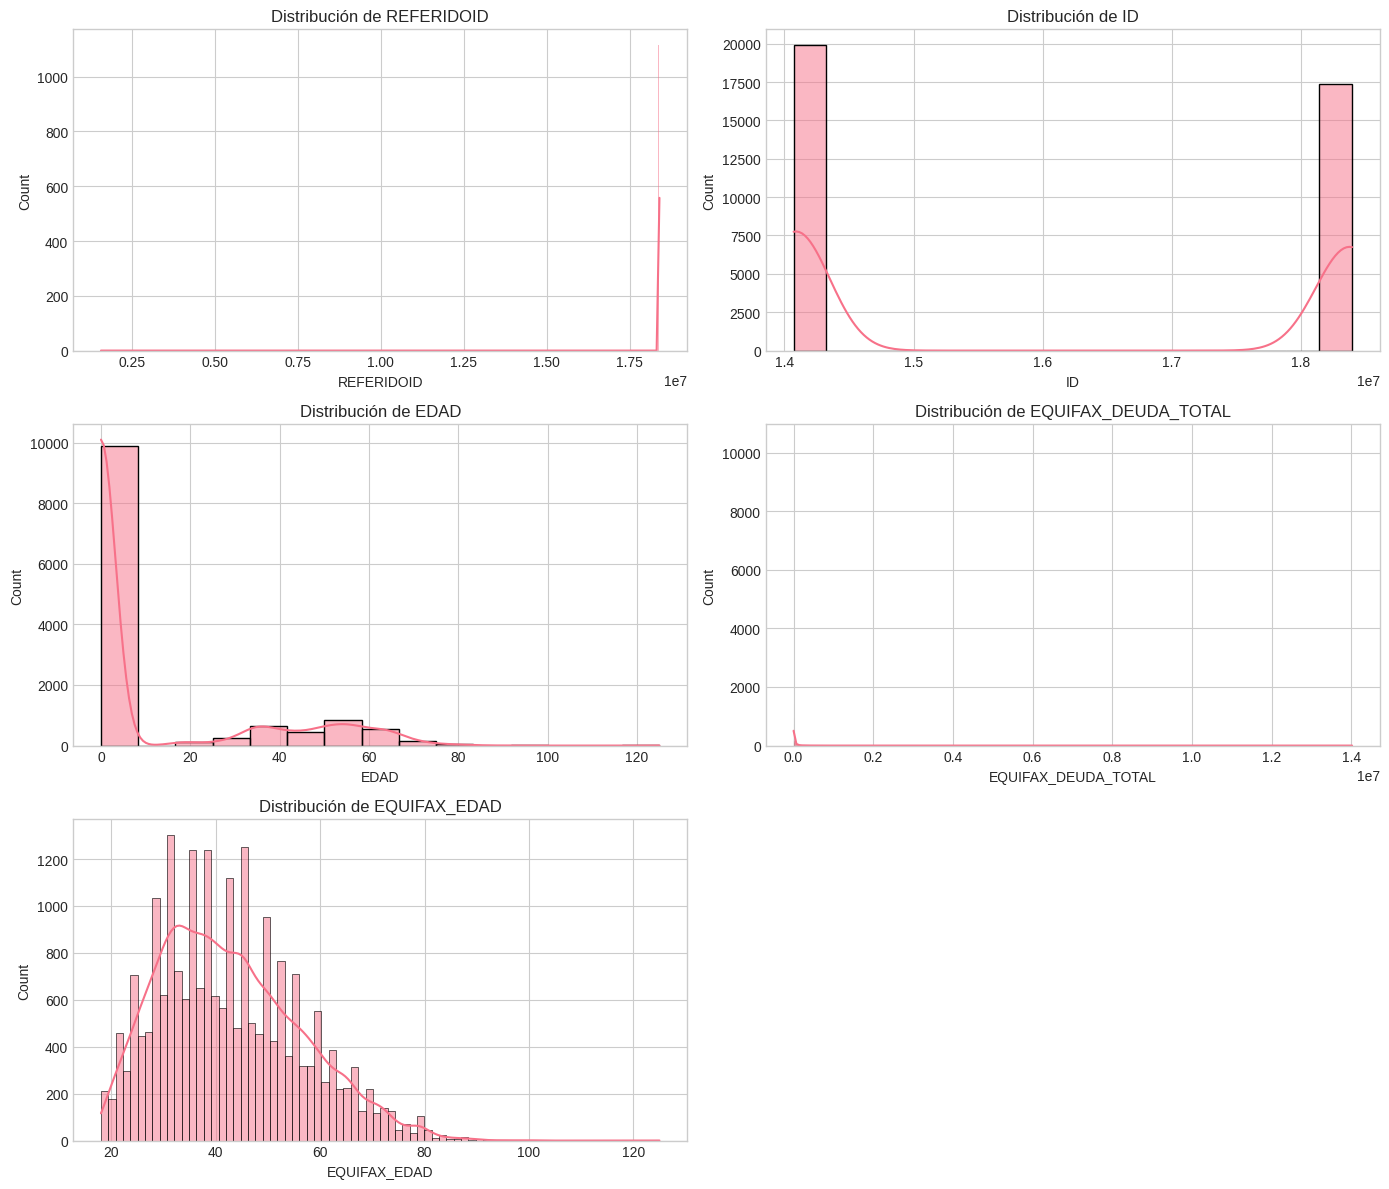

In [47]:
# =====================================================
# VISUALIZACIONES ADICIONALES
# =====================================================

print("=" * 60)
print("VISUALIZACIONES ADICIONALES")
print("=" * 60)

# Distribución de variables numéricas
numeric_cols_plot = df.select_dtypes(include=[np.number]).columns[:8]  # Primeras 8 columnas

if len(numeric_cols_plot) > 0:
    n_cols = 2
    n_rows = (len(numeric_cols_plot) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(numeric_cols_plot):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {col}')

    # Ocultar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

### 4.4 Hallazgos del EDA

**Instrucciones:** Resuma los principales hallazgos de la exploración de datos:

---

**Hallazgos Principales:**
1. **Tamaño y Estructura del Dataset:** El conjunto de datos consta de 37,302 registros y 40 columnas, predominando las variables de tipo `object` (categóricas o texto) sobre las numéricas (`float64`, `int64`).
2. **Variable Objetivo:** Se identificó un desbalance respecto a la variable `CIERRE_VENTA`. La clase 'Si' es crucial para el objetivo del proyecto, representa solo el 24.2% de los datos, mientras que 'Pendiente' es la clase mayoritaria.
3. **Análisis de Datos** Las columnas son identificadores o contienen información textual y de contacto, sugiriendo que podrían no ser features directos y necesitarán un tratamiento especial o eliminación.

**Problemas Identificados:**
1. **Valores Faltantes:** Variedad número de columnas respecto a datos del usuario y las relacionadas con información crediticia  presentan un alto porcentaje de valores faltantes.
2. **Preprocesamiento de Variables:** La gran mayoría de las columnas requieren codificación antes de ser utilizadas en un modelo de Deep Learning.
3. **Binarización de la Variable Objetivo:** Para el problema de clasificación binaria, la variable `CIERRE_VENTA` deberá ser binarizada (valores 0 y 1).

**Acciones a Tomar:**
1. **Estrategia de Tratamiento de Valores Faltantes:** Implementar una estrategia de imputación (ej. media/mediana para numéricas, moda para categóricas) o eliminar columnas con un porcentaje excesivamente alto de valores faltantes.
2. **Binarización y Preparación de la Variable Objetivo:** Transformar la columna `CIERRE_VENTA` en una variable binaria (0 o 1) para alinearla con el problema de clasificación.
3. **Eliminación de Columnas Irrelevantes:** Remover columnas que no aportan valor predictivo directo, como identificadores, datos de contacto o texto libre no procesado, para reducir la dimensionalidad y evitar ruido.

---

---
## 5. Preprocesamiento de Datos

### 5.1 Tratamiento de Valores Faltantes

In [48]:
df_clean = df.copy()
print("Copia del DataFrame original creada en 'df_clean'.")

Copia del DataFrame original creada en 'df_clean'.


In [49]:
print("\nTransformando 'CIERRE_VENTA' a 'Cierre_Exitoso' binaria...")
# 1. Cree una nueva columna llamada 'Cierre_Exitoso'
# 2. Asigne el valor 1 a 'Cierre_Exitoso' donde la columna 'CIERRE_VENTA' tenga el valor 'Si'.
# 3. Asigne el valor 0 a 'Cierre_Exitoso' para todas las demás categorías.
df_clean['Cierre_Exitoso'] = df_clean['CIERRE_VENTA'].apply(lambda x: 1 if x == 'Si' else 0)

# 4. Elimine la columna original 'CIERRE_VENTA'
df_clean.drop(columns=['CIERRE_VENTA'], inplace=True)

print("'CIERRE_VENTA' convertida a 'Cierre_Exitoso' y columna original eliminada.")
print("Distribución de 'Cierre_Exitoso':")
print(df_clean['Cierre_Exitoso'].value_counts())



Transformando 'CIERRE_VENTA' a 'Cierre_Exitoso' binaria...
'CIERRE_VENTA' convertida a 'Cierre_Exitoso' y columna original eliminada.
Distribución de 'Cierre_Exitoso':
Cierre_Exitoso
0    28272
1     9030
Name: count, dtype: int64


In [50]:
# 5. Cambiar nombre de Columna 'Cierre_Exitoso' a 'CIERRE_VENTA'
df_clean.rename(columns={'Cierre_Exitoso': 'CIERRE_VENTA'}, inplace=True)

In [51]:
print("\nVerificación de la distribución de 'CIERRE_VENTA':")
# 1. Muestre la cuenta de valores para la columna 'CIERRE_VENTA' en `df_clean`.
value_counts = df_clean['CIERRE_VENTA'].value_counts()
print("Conteo de valores:")
print(value_counts)

# 2. Calcule el porcentaje de cada clase en la columna 'CIERRE_VENTA'.
percentage = df_clean['CIERRE_VENTA'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada clase:")
print(percentage)

# 3. Imprima un mensaje resumiendo la distribución y el balance de clases.
print("\nResumen del balance de clases para 'CIERRE_VENTA':")
print(f"La clase 0 (No Cierre) representa el {percentage[0]:.2f}% de los datos.")
print(f"La clase 1 (CIERRE_VENTA) representa el {percentage[1]:.2f}% de los datos.")
print("Esta distribución confirma que la transformación binaria fue exitosa y muestra el desbalance de clases inicial.")


Verificación de la distribución de 'CIERRE_VENTA':
Conteo de valores:
CIERRE_VENTA
0    28272
1     9030
Name: count, dtype: int64

Porcentaje de cada clase:
CIERRE_VENTA
0    75.792183
1    24.207817
Name: proportion, dtype: float64

Resumen del balance de clases para 'CIERRE_VENTA':
La clase 0 (No Cierre) representa el 75.79% de los datos.
La clase 1 (CIERRE_VENTA) representa el 24.21% de los datos.
Esta distribución confirma que la transformación binaria fue exitosa y muestra el desbalance de clases inicial.


In [52]:
# =====================================================
# INFORMACIÓN GENERAL DEL DATASET
# =====================================================
display(df_clean.head())
df_clean.info()
display(df_clean.describe())


,REFERIDOID,ID,ESTADO,FECHA_REGISTRO,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,EMAIL,NOMBRE,APELLIDO,EMPRESA,...,FCH_SEGUIMIENTO_FIN,FECHA_PRIMER_CONTACTO,DIFERENCIA_PRIMER_CONTACTO,DIF_CAL_PRIMER_CONTACTO,BANCARIZADO,CALIFICACION,EQUIFAX_DEUDA_TOTAL,EQUIFAX_EDAD,LEGAL,CIERRE_VENTA
0,18395824,18395824.0,ACTIVO,31/07/2025 23:56:11,RUC,20607085642,CESAR_PASTUS@GMAIL.COM,AGROESTRUCTURAS EMPRESA INDIVIDUAL DE RESPONSA...,AGROESTRUCTURAS,NaN,...,NaN,NaN,NaN,NaN,NO,ND,NaN,NaN,NaN,1
1,18395823,14108923.0,ACTIVO,31/07/2025 23:55:37,DNI,80614524,luisrrafaelo@gmail.com,Rafaelo Rojas Luis,Rojas Rojas,NaN,...,NaN,NaN,NaN,NaN,SI,ND,0.00,46.0,Si,0
2,18395822,14108922.0,ACTIVO,31/07/2025 23:55:37,DNI,80614524,luisrrafaelo@gmail.com,Rafaelo Rojas Luis,Rojas Rojas,NaN,...,NaN,NaN,NaN,NaN,SI,ND,0.00,46.0,Si,0
3,18395821,18395821.0,ACTIVO,31/07/2025 23:50:37,DNI,75376541,maricarmen.bustamante1245@gmail.com,MARICARMEN,BUSTAMANTE OCAÑA,NaN,...,04/08/2025 18:08:00,01/08/2025 00:05:03,0D 0H:0M:0S,0:14:24,SI,NORMAL,1945.48,27.0,NaN,0
4,18395820,18395820.0,ACTIVO,31/07/2025 23:49:00,DNI,72329959,julissa_005@hotmail.com,ROSARIO DEL PILAR,CORNEJO HERENCIA,NaN,...,04/08/2025 18:08:00,01/08/2025 00:04:08,0D 0H:0M:0S,0:14:24,SI,NORMAL,20001.80,33.0,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37302 entries, 0 to 37301
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   REFERIDOID                  37302 non-null  int64  
 1   ID                          37301 non-null  float64
 2   ESTADO                      37302 non-null  object 
 3   FECHA_REGISTRO              37302 non-null  object 
 4   TIPO_DOCUMENTO              37302 non-null  object 
 5   NUMERO_DOCUMENTO            37302 non-null  object 
 6   EMAIL                       36519 non-null  object 
 7   NOMBRE                      37273 non-null  object 
 8   APELLIDO                    37302 non-null  object 
 9   EMPRESA                     1847 non-null   object 
 10  TELEFONO                    36740 non-null  object 
 11  CELULAR                     11155 non-null  object 
 12  EDAD                        12913 non-null  float64
 13  SEXO                        206

,REFERIDOID,ID,EDAD,EQUIFAX_DEUDA_TOTAL,EQUIFAX_EDAD,CIERRE_VENTA
count,3.730200e+04,3.730100e+04,12913.000000,2.206500e+04,22065.000000,37302.000000
mean,1.837656e+07,1.608500e+07,11.394022,3.452085e+04,42.679311,0.242078
std,8.767986e+04,2.138519e+06,21.607647,1.458850e+05,13.597033,0.428347
min,1.577676e+06,1.407082e+07,0.000000,0.000000e+00,18.000000,0.000000
25%,1.836784e+07,1.408796e+07,0.000000,0.000000e+00,32.000000,0.000000
50%,1.837716e+07,1.410497e+07,0.000000,2.112070e+03,41.000000,0.000000
75%,1.838649e+07,1.837380e+07,0.000000,2.126767e+04,52.000000,0.000000
max,1.839582e+07,1.839582e+07,125.000000,1.402116e+07,125.000000,1.000000


In [53]:
# =====================================================
# TRATAMIENTO DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 60)

# Opción 1: Eliminar filas con valores faltantes
# df_clean = df_clean.dropna()

# Opción 2: Imputar con la media (variables numéricas)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# Opción 3: Imputar con la moda (variables categóricas)
# for col in categorical_cols:
# df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Opción 4: Imputación avanzada con KNN
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de imputación
# =====================================================



print(f"\n✅ Valores faltantes tratados")
print(f"   Filas restantes: {len(df_clean):,}")

TRATAMIENTO DE VALORES FALTANTES

✅ Valores faltantes tratados
   Filas restantes: 37,302


### 5.2 Tratamiento de Outliers

In [54]:
# =====================================================
# DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# =====================================================

print("=" * 60)
print("DETECCIÓN DE OUTLIERS")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detectar outliers en cada columna numérica
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        outlier_summary.append({
            'Variable': col,
            'N_Outliers': n_outliers,
            'Porcentaje (%)': round(n_outliers/len(df_clean)*100, 2),
            'Límite_Inferior': round(lower, 2),
            'Límite_Superior': round(upper, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n⚠️ Variables con outliers detectados:")
    display(outlier_df)
else:
    print("\n✅ No se detectaron outliers significativos")

DETECCIÓN DE OUTLIERS

⚠️ Variables con outliers detectados:


,Variable,N_Outliers,Porcentaje (%),Límite_Inferior,Límite_Superior
0,REFERIDOID,1,0.00,18339852.50,18414478.50
1,EDAD,2844,7.62,-17.09,28.49
2,EQUIFAX_DEUDA_TOTAL,2168,5.81,-49793.28,85109.34
3,EQUIFAX_EDAD,8003,21.45,29.00,53.00
4,CIERRE_VENTA,9030,24.21,0.00,0.00


In [55]:
# =====================================================
# TRATAMIENTO DE OUTLIERS (OPCIONAL)
# =====================================================

# Opción 1: Eliminar outliers
# for col in numeric_cols:
#     Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

# Opción 2: Capear outliers (winsorizing)
# from scipy.stats import mstats
# for col in numeric_cols:
#     df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])

# Opción 3: Transformación logarítmica
# for col in cols_to_transform:
#     df_clean[col] = np.log1p(df_clean[col])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de tratamiento : Aplicaremos Winsorizing para mantener la data pero con una reduccción de la influencia desproporcionada de los outliers en el modelo, pero mantiene la ordenación relativa de los datos
# =====================================================
# Opción 2: Capear outliers (winsorizing)
from scipy.stats import mstats
for col in numeric_cols:
    df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])


### 5.3 Codificación de Variables Categóricas

In [ ]:
# =====================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# =====================================================

print("=" * 60)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar variables categóricas
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nVariables categóricas encontradas: {categorical_cols}")

# Opción 1: Label Encoding (para variables ordinales o target)
# le = LabelEncoder()
# df_clean['columna_encoded'] = le.fit_transform(df_clean['columna'])

# Opción 2: One-Hot Encoding (para variables nominales)
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Opción 3: Target Encoding
# from sklearn.preprocessing import TargetEncoder
# encoder = TargetEncoder()
# df_clean[categorical_cols] = encoder.fit_transform(df_clean[categorical_cols], df_clean[TARGET_COLUMN])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de codificación
# =====================================================



print(f"\n✅ Codificación Categórica completada")
print(f"   Nuevas dimensiones finales: {df_clean.shape}")

CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Variables categóricas encontradas: ['ESTADO', 'FECHA_REGISTRO', 'TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO', 'EMAIL', 'NOMBRE', 'APELLIDO', 'EMPRESA', 'TELEFONO', 'CELULAR', 'SEXO', 'CATEGORIA', 'DIRECCION', 'UBIGEO', 'PRODUCTO', 'COMENTARIO', 'AGENTE_ASIGNADO', 'CLIENTE_MAPFRE', 'FECHA_REGISTRO_COMERCIAL', 'CONTACTAR_CLIENTE', 'FECHA_HORA_CONTACTO', 'FECHA_VENTA', 'FECHA_VENTA_TRON', 'MOTIVO_NO_CIERRE_VENTA', 'RESUMEN_ACTIVIDAD', 'OBSERVACIONES', 'FCH_SEGUIMIENTO', 'FCH_SEGUIMIENTO_FIN', 'FECHA_PRIMER_CONTACTO', 'DIFERENCIA_PRIMER_CONTACTO', 'DIF_CAL_PRIMER_CONTACTO', 'BANCARIZADO', 'CALIFICACION', 'LEGAL']


### 5.4 Escalado/Normalización de Features

In [56]:
# =====================================================
# ESCALADO DE FEATURES
# =====================================================

print("=" * 60)
print("ESCALADO DE FEATURES")
print("=" * 60)

# Separar features y target
X = df_clean.drop(columns=[TARGET_COLUMN])
y = df_clean[TARGET_COLUMN]

# NEW STEP: Ensure all columns in X are numeric before scaling
# Identify any remaining non-numeric columns
non_numeric_cols_X = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols_X) > 0:
    print(f"\n⚠️ Advertencia: Se encontraron columnas no numéricas en X después del preprocesamiento: {list(non_numeric_cols_X)}")
    print("   Se procederá a eliminarlas para el escalado.")
    X = X.drop(columns=non_numeric_cols_X)

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Opción 1: StandardScaler (media=0, std=1) - Recomendado para redes neuronales
scaler = StandardScaler()

# Opción 2: MinMaxScaler (rango [0,1])
# scaler = MinMaxScaler()

# Opción 3: RobustScaler (robusto a outliers)
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

# Aplicar escalado
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\n✅ Escalado completado usando {type(scaler).__name__}")
print(f"   Media de features: {X_scaled.mean().mean():.6f}")
print(f"   Std de features: {X_scaled.std().mean():.6f}")


ESCALADO DE FEATURES

⚠️ Advertencia: Se encontraron columnas no numéricas en X después del preprocesamiento: ['ESTADO', 'FECHA_REGISTRO', 'TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO', 'EMAIL', 'NOMBRE', 'APELLIDO', 'EMPRESA', 'TELEFONO', 'CELULAR', 'SEXO', 'CATEGORIA', 'DIRECCION', 'UBIGEO', 'PRODUCTO', 'COMENTARIO', 'AGENTE_ASIGNADO', 'CLIENTE_MAPFRE', 'FECHA_REGISTRO_COMERCIAL', 'CONTACTAR_CLIENTE', 'FECHA_HORA_CONTACTO', 'FECHA_VENTA', 'FECHA_VENTA_TRON', 'MOTIVO_NO_CIERRE_VENTA', 'RESUMEN_ACTIVIDAD', 'OBSERVACIONES', 'FCH_SEGUIMIENTO', 'FCH_SEGUIMIENTO_FIN', 'FECHA_PRIMER_CONTACTO', 'DIFERENCIA_PRIMER_CONTACTO', 'DIF_CAL_PRIMER_CONTACTO', 'BANCARIZADO', 'CALIFICACION', 'LEGAL']
   Se procederá a eliminarlas para el escalado.

Dimensiones de X: (37302, 5)
Dimensiones de y: (37302,)

✅ Escalado completado usando StandardScaler
   Media de features: -0.000000
   Std de features: 1.000013


### 5.5 Dataset final preparado para modelamiento

In [57]:
# =====================================================
# DATASET FINAL PREPARADO
# =====================================================
print("Shape final de X:", X_scaled.shape)
print("Shape final de y:", y.shape)

X_scaled.head()

Shape final de X: (37302, 5)
Shape final de y: (37302,)


,REFERIDOID,ID,EDAD,EQUIFAX_DEUDA_TOTAL,EQUIFAX_EDAD
0,1.557032,1.079431,-1.04676,0.374041,0.015545
1,1.557032,-0.924152,0.06543,-1.003039,0.375652
2,1.557032,-0.924152,0.06543,-1.003039,0.375652
3,1.557032,1.079431,-1.04676,-0.925431,-1.684775
4,1.557032,1.079431,-1.04676,-0.205142,-1.034114


### 5.6 División de Datos (Train/Validation/Test)

In [58]:
# =====================================================
# DIVISIÓN DE DATOS
# =====================================================

print("=" * 60)
print("DIVISIÓN DE DATOS")
print("=" * 60)

# División en train (70%), validation (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=RANDOM_SEED, stratify=y if y.dtype == 'object' or y.nunique() < 20 else None
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=RANDOM_SEED, stratify=y_temp if y_temp.dtype == 'object' or y_temp.nunique() < 20 else None  # 0.176 ≈ 15% del total
)

print(f"\n📊 División de datos:")
print(f"   Training set:   {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Validation set: {X_val.shape[0]:,} muestras ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

# Verificar distribución de clases (para clasificación)
if y.dtype == 'object' or y.nunique() < 20:
    print(f"\n📊 Distribución de clases en cada conjunto:")
    print(f"   Train: {dict(y_train.value_counts(normalize=True).round(3))}")
    print(f"   Val:   {dict(y_val.value_counts(normalize=True).round(3))}")
    print(f"   Test:  {dict(y_test.value_counts(normalize=True).round(3))}")

DIVISIÓN DE DATOS

📊 División de datos:
   Training set:   26,125 muestras (70.0%)
   Validation set: 5,581 muestras (15.0%)
   Test set:       5,596 muestras (15.0%)

📊 Distribución de clases en cada conjunto:
   Train: {0: np.float64(0.758), 1: np.float64(0.242)}
   Val:   {0: np.float64(0.758), 1: np.float64(0.242)}
   Test:  {0: np.float64(0.758), 1: np.float64(0.242)}


### 5.7 Preparación de Datos para Deep Learning

In [59]:
# =====================================================
# PREPARACIÓN PARA PYTORCH
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA PYTORCH")
print("=" * 60)

# Convertir a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
X_test_tensor = torch.FloatTensor(X_test.values)

# Para clasificación
if y.dtype == 'object' or y.nunique() < 20:
    # Codificar labels si es necesario
    if y_train.dtype == 'object':
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_val_encoded = label_encoder.transform(y_val)
        y_test_encoded = label_encoder.transform(y_test)
    else:
        y_train_encoded = y_train.values
        y_val_encoded = y_val.values
        y_test_encoded = y_test.values

    y_train_tensor = torch.LongTensor(y_train_encoded)
    y_val_tensor = torch.LongTensor(y_val_encoded)
    y_test_tensor = torch.LongTensor(y_test_encoded)
else:
    # Para regresión
    y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)
    y_val_tensor = torch.FloatTensor(y_val.values).unsqueeze(1)
    y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

# Crear DataLoaders
BATCH_SIZE = 32  # Ajuste según su dataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"\n✅ DataLoaders creados")
print(f"   Batch size: {BATCH_SIZE}")
print(f"   Batches de entrenamiento: {len(train_loader)}")
print(f"   Batches de validación: {len(val_loader)}")
print(f"   Batches de test: {len(test_loader)}")

PREPARACIÓN DE DATOS PARA PYTORCH

✅ DataLoaders creados
   Batch size: 32
   Batches de entrenamiento: 817
   Batches de validación: 175
   Batches de test: 175


In [60]:
# =====================================================
# PREPARACIÓN PARA TENSORFLOW/KERAS (ALTERNATIVA)
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS")
print("=" * 60)

# Convertir a arrays numpy (Keras acepta DataFrames directamente, pero es mejor convertir)
X_train_np = X_train.values.astype('float32')
X_val_np = X_val.values.astype('float32')
X_test_np = X_test.values.astype('float32')

# Para clasificación: One-hot encoding del target
if y.dtype == 'object' or y.nunique() < 20:
    num_classes = y.nunique()
    y_train_np = keras.utils.to_categorical(y_train_encoded, num_classes)
    y_val_np = keras.utils.to_categorical(y_val_encoded, num_classes)
    y_test_np = keras.utils.to_categorical(y_test_encoded, num_classes)
else:
    y_train_np = y_train.values.astype('float32')
    y_val_np = y_val.values.astype('float32')
    y_test_np = y_test.values.astype('float32')

print(f"\n✅ Datos preparados para TensorFlow/Keras")
print(f"   Shape X_train: {X_train_np.shape}")
print(f"   Shape y_train: {y_train_np.shape}")

PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS

✅ Datos preparados para TensorFlow/Keras
   Shape X_train: (26125, 5)
   Shape y_train: (26125, 2)


---
## 6. Diseño y Arquitectura del Modelo

### 6.1 Justificación de la Arquitectura

**Instrucciones:** Justifique la elección de su arquitectura de red neuronal:
- ¿Por qué eligió este tipo de arquitectura?
**Como es un problema de predicción de probabilidad de cierre de venta de los leads, entonces asocio a que es un problema de clasificacion binaria con datos tabulares por ello elegí RED NEURONAL MULTICAPA (MPL) que es una red neuronal completa con 3 capac de 128, 64 y 32.**
- ¿Qué alternativas consideró?

**Consideré los distintos modelos de machine learning , como:**
1. Regresión logística: Modelo simple e interpretable, es util para puntos de referencia pero no relaciones complejas.
2. Random Forest: Algoritmos potentes y con meor rendimiento en datos tabulares.
3. Support Vector Machines: Efectivo con un buen kernel pero costoso y menos transparente para mi volumen de datos.**
- ¿Cómo determinó el número de capas y neuronas?

**El número de capas y neuronas se determinó por una combinación de datos común. Se comenzó con una configuración de número de neuronas que disminuye progresivamente en capas. También la primera capa ( 128 neuronas) ayuda a trabaar la capa de entregada ( 5 caracteristicas).**

---

*[Escriba su justificación aquí]*



---

### 6.2 Definición del Modelo

In [61]:
# =====================================================
# DEFINICIÓN DEL MODELO CON PYTORCH
# =====================================================

class NeuralNetwork(nn.Module):
    """
    Red Neuronal para [Clasificación/Regresión]

    Arquitectura:
    - Capa de entrada: [n_features] neuronas
    - Capas ocultas: [Describir]
    - Capa de salida: [n_outputs] neuronas
    """

    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.3):
        super(NeuralNetwork, self).__init__()

        layers = []
        prev_size = input_size

        # Capas ocultas
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size

        # Capa de salida
        layers.append(nn.Linear(prev_size, output_size))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# =====================================================
# CONFIGURACIÓN DEL MODELO
# =====================================================

INPUT_SIZE = X_train.shape[1]
HIDDEN_SIZES = [128, 64, 32]  # Ajuste según su problema
OUTPUT_SIZE = y.nunique() if (y.dtype == 'object' or y.nunique() < 20) else 1
DROPOUT_RATE = 0.3

# Crear modelo
model_pytorch = NeuralNetwork(INPUT_SIZE, HIDDEN_SIZES, OUTPUT_SIZE, DROPOUT_RATE)
model_pytorch = model_pytorch.to(device)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (PyTorch)")
print("=" * 60)
print(model_pytorch)

# Contar parámetros
total_params = sum(p.numel() for p in model_pytorch.parameters())
trainable_params = sum(p.numel() for p in model_pytorch.parameters() if p.requires_grad)
print(f"\n📊 Parámetros totales: {total_params:,}")
print(f"   Parámetros entrenables: {trainable_params:,}")

ARQUITECTURA DEL MODELO (PyTorch)
NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=5, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=32, out_features=2, bias=True)
  )
)

📊 Parámetros totales: 11,618
   Parámetros entrenables: 11,618


In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON KERAS (ALTERNATIVA)
# =====================================================

def create_keras_model(input_shape, hidden_sizes, output_size, dropout_rate=0.3, task='classification'):
    """
    Crea un modelo de red neuronal con Keras.

    Args:
        input_shape: Dimensión de entrada
        hidden_sizes: Lista con el número de neuronas por capa oculta
        output_size: Número de neuronas de salida
        dropout_rate: Tasa de dropout
        task: 'classification' o 'regression'
    """
    model = keras.Sequential()

    # Capa de entrada
    model.add(layers.Input(shape=(input_shape,)))

    # Capas ocultas
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(dropout_rate))

    # Capa de salida
    if task == 'classification':
        if output_size == 2:
            model.add(layers.Dense(1, activation='sigmoid'))
        else:
            model.add(layers.Dense(output_size, activation='softmax'))
    else:
        model.add(layers.Dense(1, activation='linear'))

    return model

# Crear modelo Keras
TASK = 'classification'  # Cambie a 'regression' si es necesario

model_keras = create_keras_model(
    input_shape=INPUT_SIZE,
    hidden_sizes=HIDDEN_SIZES,
    output_size=OUTPUT_SIZE,
    dropout_rate=DROPOUT_RATE,
    task=TASK
)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (Keras)")
print("=" * 60)
model_keras.summary()

### 6.3 Diagrama de la Arquitectura

**Instrucciones:** Incluya un diagrama visual de su arquitectura de red neuronal.

---

*[Inserte diagrama o descripción visual de la arquitectura]*

```
Input Layer          Hidden Layer 1       Hidden Layer 2       Output Layer
[n features]   -->   [128 neurons]   -->  [64 neurons]    -->  [n classes]
                     + BatchNorm          + BatchNorm
                     + ReLU               + ReLU
                     + Dropout(0.3)       + Dropout(0.3)
```

---

---
## 7. Entrenamiento del Modelo

### 7.1 Configuración del Entrenamiento

In [62]:
# =====================================================
# HIPERPARÁMETROS DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CONFIGURACIÓN DEL ENTRENAMIENTO")
print("=" * 60)

# Hiperparámetros
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 32
EARLY_STOPPING_PATIENCE = 10

print(f"\n📋 Hiperparámetros:")
print(f"   Learning Rate: {LEARNING_RATE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")

CONFIGURACIÓN DEL ENTRENAMIENTO

📋 Hiperparámetros:
   Learning Rate: 0.001
   Epochs: 100
   Batch Size: 32
   Early Stopping Patience: 10


In [63]:
# =====================================================
# CONFIGURACIÓN DE LOSS Y OPTIMIZADOR (PyTorch)
# =====================================================

# Seleccionar función de pérdida según el tipo de problema
if y.dtype == 'object' or y.nunique() < 20:
    # Clasificación
    criterion = nn.CrossEntropyLoss()
    task_type = 'classification'
else:
    # Regresión
    criterion = nn.MSELoss()
    task_type = 'regression'

# Optimizador
optimizer = optim.Adam(model_pytorch.parameters(), lr=LEARNING_RATE)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5
)

print(f"\n📋 Configuración:")
print(f"   Tipo de problema: {task_type}")
print(f"   Función de pérdida: {criterion}")
print(f"   Optimizador: Adam")
print(f"   Scheduler: ReduceLROnPlateau")


📋 Configuración:
   Tipo de problema: classification
   Función de pérdida: CrossEntropyLoss()
   Optimizador: Adam
   Scheduler: ReduceLROnPlateau


### 7.2 Entrenamiento del Modelo (PyTorch)

In [64]:
# =====================================================
# FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN
# =====================================================

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Entrena el modelo por una época."""
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if task_type == 'classification':
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total if task_type == 'classification' else None

    return avg_loss, accuracy

def evaluate(model, val_loader, criterion, device):
    """Evalúa el modelo en el conjunto de validación."""
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()

            if task_type == 'classification':
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total if task_type == 'classification' else None

    return avg_loss, accuracy

In [65]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (PyTorch)
# =====================================================

print("=" * 60)
print("ENTRENAMIENTO DEL MODELO")
print("=" * 60)

# Historial de entrenamiento
history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}

# Early stopping
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None

print(f"\n🚀 Iniciando entrenamiento...\n")

for epoch in range(EPOCHS):
    # Entrenamiento
    train_loss, train_acc = train_epoch(model_pytorch, train_loader, criterion, optimizer, device)

    # Validación
    val_loss, val_acc = evaluate(model_pytorch, val_loader, criterion, device)

    # Guardar historial
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    if task_type == 'classification':
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # Scheduler step
    scheduler.step(val_loss)

    # Imprimir progreso cada 10 épocas
    if (epoch + 1) % 10 == 0 or epoch == 0:
        if task_type == 'classification':
            print(f"Época {epoch+1:3d}/{EPOCHS} | "
                  f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
                  f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        else:
            print(f"Época {epoch+1:3d}/{EPOCHS} | "
                  f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = model_pytorch.state_dict().copy()
    else:
        patience_counter += 1
        if patience_counter >= EARLY_STOPPING_PATIENCE:
            print(f"\n⚠️ Early stopping en época {epoch+1}")
            break

# Cargar mejor modelo
if best_model_state is not None:
    model_pytorch.load_state_dict(best_model_state)
    print(f"\n✅ Mejor modelo cargado (Val Loss: {best_val_loss:.4f})")

print(f"\n🎉 Entrenamiento completado!")

ENTRENAMIENTO DEL MODELO

🚀 Iniciando entrenamiento...

Época   1/100 | Train Loss: 0.4355 | Train Acc: 0.8162 | Val Loss: 0.4065 | Val Acc: 0.8296
Época  10/100 | Train Loss: 0.4037 | Train Acc: 0.8328 | Val Loss: 0.4013 | Val Acc: 0.8301
Época  20/100 | Train Loss: 0.4003 | Train Acc: 0.8349 | Val Loss: 0.3990 | Val Acc: 0.8301
Época  30/100 | Train Loss: 0.3993 | Train Acc: 0.8358 | Val Loss: 0.4005 | Val Acc: 0.8314

⚠️ Early stopping en época 34

✅ Mejor modelo cargado (Val Loss: 0.3980)

🎉 Entrenamiento completado!


### 7.3 Entrenamiento del Modelo (Keras - Alternativa)

In [ ]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (KERAS)
# =====================================================

# Compilar modelo
if TASK == 'classification':
    if OUTPUT_SIZE == 2:
        model_keras.compile(
            optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    else:
        model_keras.compile(
            optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
else:
    model_keras.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='mse',
        metrics=['mae']
    )

# Callbacks
keras_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1
    ),
    callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )
]

# Entrenar
print("=" * 60)
print("ENTRENAMIENTO DEL MODELO (KERAS)")
print("=" * 60)

history_keras = model_keras.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=keras_callbacks,
    verbose=1
)

print("\n🎉 Entrenamiento completado!")

### 7.4 Visualización del Entrenamiento

CURVAS DE APRENDIZAJE


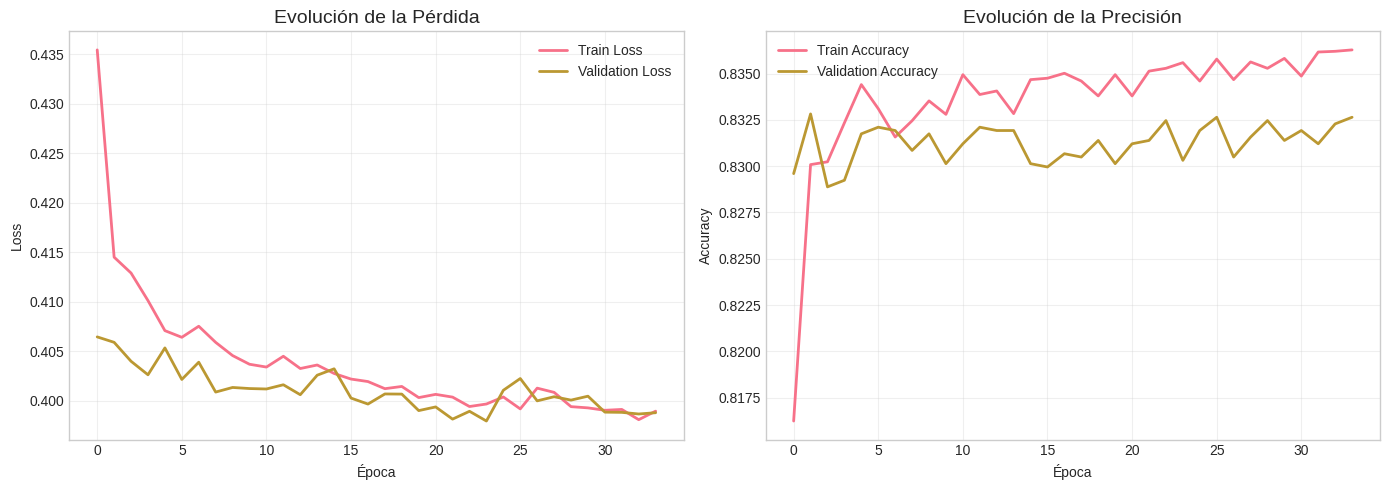


📊 Análisis del Entrenamiento:
   Épocas completadas: 34
   Mejor val_loss: 0.3980 (época 24)
   Mejor val_acc: 0.8328 (época 2)


In [30]:
# =====================================================
# VISUALIZACIÓN DEL PROCESO DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CURVAS DE APRENDIZAJE")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de pérdida
axes[0].plot(history['train_loss'], label='Train Loss', linewidth=2)
axes[0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Evolución de la Pérdida', fontsize=14)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico de precisión (solo para clasificación)
if task_type == 'classification':
    axes[1].plot(history['train_acc'], label='Train Accuracy', linewidth=2)
    axes[1].plot(history['val_acc'], label='Validation Accuracy', linewidth=2)
    axes[1].set_title('Evolución de la Precisión', fontsize=14)
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'N/A para Regresión', ha='center', va='center', fontsize=14)
    axes[1].set_title('Precisión (No aplica)')

plt.tight_layout()
plt.show()

# Análisis del entrenamiento
print("\n📊 Análisis del Entrenamiento:")
print(f"   Épocas completadas: {len(history['train_loss'])}")
print(f"   Mejor val_loss: {min(history['val_loss']):.4f} (época {history['val_loss'].index(min(history['val_loss']))+1})")
if task_type == 'classification':
    print(f"   Mejor val_acc: {max(history['val_acc']):.4f} (época {history['val_acc'].index(max(history['val_acc']))+1})")

---
## 8. Evaluación y Métricas

### 8.1 Evaluación en el Conjunto de Test

In [31]:
# =====================================================
# EVALUACIÓN EN EL CONJUNTO DE TEST
# =====================================================

print("=" * 60)
print("EVALUACIÓN EN CONJUNTO DE TEST")
print("=" * 60)

# Hacer predicciones
model_pytorch.eval()
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    outputs = model_pytorch(X_test_device)

    if task_type == 'classification':
        _, y_pred = torch.max(outputs, 1)
        y_pred = y_pred.cpu().numpy()
        y_true = y_test_tensor.numpy()
        y_proba = torch.softmax(outputs, dim=1).cpu().numpy()
    else:
        y_pred = outputs.cpu().numpy().flatten()
        y_true = y_test_tensor.numpy().flatten()

print(f"\n✅ Predicciones realizadas: {len(y_pred)} muestras")

EVALUACIÓN EN CONJUNTO DE TEST

✅ Predicciones realizadas: 5596 muestras


MÉTRICAS DE CLASIFICACIÓN

📊 Métricas Principales:
   Accuracy:  0.8381
   Precision: 0.8300
   Recall:    0.8381
   F1-Score:  0.8312

📋 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4241
           1       0.71      0.56      0.63      1355

    accuracy                           0.84      5596
   macro avg       0.79      0.74      0.76      5596
weighted avg       0.83      0.84      0.83      5596



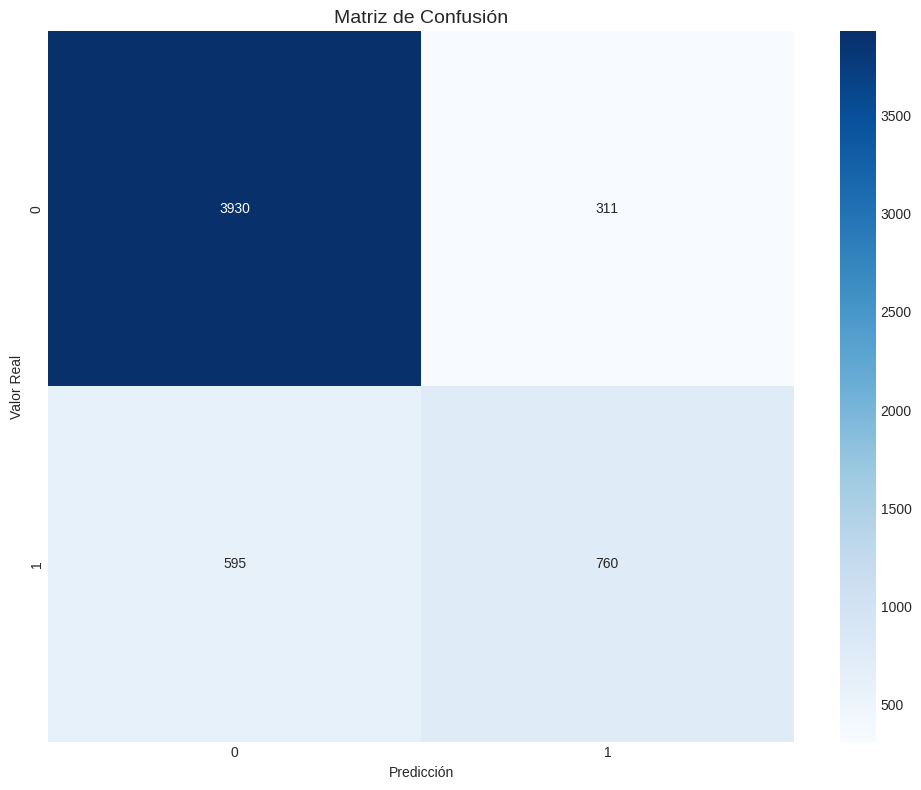

In [32]:
# =====================================================
# MÉTRICAS DE CLASIFICACIÓN
# =====================================================

if task_type == 'classification':
    print("=" * 60)
    print("MÉTRICAS DE CLASIFICACIÓN")
    print("=" * 60)

    # Calcular métricas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n📊 Métricas Principales:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")

    # Reporte de clasificación completo
    print(f"\n📋 Reporte de Clasificación Detallado:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(OUTPUT_SIZE),
                yticklabels=range(OUTPUT_SIZE))
    plt.title('Matriz de Confusión', fontsize=14)
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.tight_layout()
    plt.show()

In [33]:
# =====================================================
# MÉTRICAS DE REGRESIÓN
# =====================================================

if task_type == 'regression':
    print("=" * 60)
    print("MÉTRICAS DE REGRESIÓN")
    print("=" * 60)

    # Calcular métricas
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 Métricas de Regresión:")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   R²:   {r2:.4f}")

    # Gráfico de predicciones vs valores reales
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter plot
    axes[0].scatter(y_true, y_pred, alpha=0.5)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0].set_xlabel('Valor Real')
    axes[0].set_ylabel('Predicción')
    axes[0].set_title('Predicciones vs Valores Reales')

    # Distribución de residuos
    residuos = y_true - y_pred
    axes[1].hist(residuos, bins=50, edgecolor='black')
    axes[1].axvline(x=0, color='r', linestyle='--')
    axes[1].set_xlabel('Residuo')
    axes[1].set_ylabel('Frecuencia')
    axes[1].set_title('Distribución de Residuos')

    plt.tight_layout()
    plt.show()

### 8.2 Comparación con Modelo Baseline

COMPARACIÓN CON MODELO BASELINE

📊 Comparación de Modelos (Accuracy):


,Modelo,Métrica
2,Deep Learning,0.838099
0,Logistic Regression,0.832023
1,Random Forest,0.807005


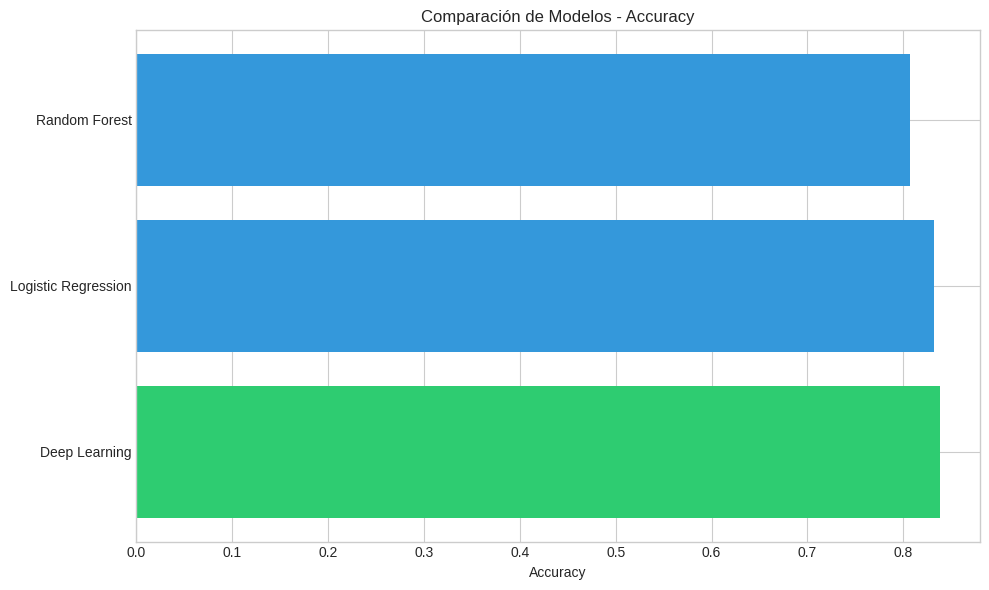

In [34]:
# =====================================================
# COMPARACIÓN CON MODELO BASELINE
# =====================================================

print("=" * 60)
print("COMPARACIÓN CON MODELO BASELINE")
print("=" * 60)

if task_type == 'classification':
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression

    # Modelos baseline
    baselines = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
    }
else:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import LinearRegression

    baselines = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)
    }

# Entrenar y evaluar baselines
results = {'Modelo': [], 'Métrica': []}

for name, model in baselines.items():
    model.fit(X_train, y_train)
    y_pred_baseline = model.predict(X_test)

    if task_type == 'classification':
        metric = accuracy_score(y_test, y_pred_baseline)
        metric_name = 'Accuracy'
    else:
        metric = r2_score(y_test, y_pred_baseline)
        metric_name = 'R²'

    results['Modelo'].append(name)
    results['Métrica'].append(metric)

# Agregar modelo de Deep Learning
results['Modelo'].append('Deep Learning')
if task_type == 'classification':
    results['Métrica'].append(accuracy)
else:
    results['Métrica'].append(r2)

# Mostrar comparación
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values('Métrica', ascending=False)

print(f"\n📊 Comparación de Modelos ({metric_name}):")
display(comparison_df)

# Visualización
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if m == 'Deep Learning' else '#3498db' for m in comparison_df['Modelo']]
plt.barh(comparison_df['Modelo'], comparison_df['Métrica'], color=colors)
plt.xlabel(metric_name)
plt.title(f'Comparación de Modelos - {metric_name}')
plt.tight_layout()
plt.show()

### 8.3 Análisis de Resultados

**Instrucciones:** Analice los resultados obtenidos:

---

**Rendimiento del Modelo:**
El modelo de Deep Learning alcanzó una Accuracy general del 83.81% en el conjunto de prueba, lo que indica que clasifica correctamente la mayoría de los leads. Sin embargo, un análisis más detallado por clase revela un desempeño diferenciado:

Clase 0 (No Cierre): El modelo muestra un rendimiento sólido en la identificación de leads que no cerrarán una venta. Obtiene una Precision del 87%, lo que significa que de todos los leads predichos como 'No Cierre', el 87% fueron realmente 'No Cierre'.

Clase 1 (Cierre): Para los leads que sí cerrarán una venta, el rendimiento es menor. La Precision es del 71%, lo que implica que de todos los leads predichos como 'Cierre', solo el 71% resultaron en un cierre real.

**Comparación con Baselines:**
*[Compare el rendimiento con los modelos baseline]*

**Fortalezas del Modelo:**
1. *Alta Capacidad para Identificar No Cierres (Clase 0): El modelo es muy bueno para determinar cuándo un lead no tiene una alta probabilidad de cerrar, lo que permite a los agentes evitar invertir tiempo en prospectos con bajo potencial. Esto optimiza el tiempo de los agentes y reduce costos operativos.
*

**Debilidades del Modelo:**
1. *Bajo Recall en la Clase 1 (Cierre): El principal problema es que el modelo solo identifica el 56% de los leads que realmente cierran una venta. Esto se traduce en un alto número de Falsos Negativos (595), lo que significa que muchas oportunidades de venta reales están siendo clasificadas erróneamente como 'No Cierre' y, por lo tanto, podrían ser desatendidas.
Impacto del Desbalance de Clases: El desbalance de clases (0: 75.79%, 1: 24.21%) probablemente contribuye al bajo Recall de la clase minoritaria (Cierre).*

**Posibles Mejoras:**
1. *Técnicas de Balanceo de Clases Avanzadas: Explorar técnicas como SMOTE, ADASYN, o el uso de pesos de clase en la función de pérdida (nn.CrossEntropyLoss(weight=...) en PyTorch) para dar más importancia a la clase minoritaria durante el entrenamiento.
*

---

---
## 9. Interpretación de Resultados

### 9.1 Importancia de Features (SHAP)

In [35]:
# =====================================================
# INTERPRETABILIDAD CON SHAP (OPCIONAL)
# =====================================================

# Instalar SHAP si no está disponible
# !pip install shap

try:
    import shap

    print("=" * 60)
    print("ANÁLISIS DE IMPORTANCIA DE FEATURES (SHAP)")
    print("=" * 60)

    # Crear explainer
    # Usar una muestra del dataset para acelerar el cálculo
    sample_size = min(100, len(X_test))
    X_sample = X_test.iloc[:sample_size]

    # Para modelos de sklearn (baselines)
    explainer = shap.TreeExplainer(baselines['Random Forest'])
    shap_values = explainer.shap_values(X_sample)

    # Visualización
    plt.figure(figsize=(12, 8))
    if task_type == 'classification' and len(shap_values) > 1:
        shap.summary_plot(shap_values[1], X_sample, plot_type="bar", show=False)
    else:
        shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
    plt.title('Importancia de Features (SHAP)')
    plt.tight_layout()
    plt.show()

except ImportError:
    print("⚠️ SHAP no está instalado. Ejecute: !pip install shap")
except Exception as e:
    print(f"⚠️ Error en análisis SHAP: {e}")

ANÁLISIS DE IMPORTANCIA DE FEATURES (SHAP)
⚠️ Error en análisis SHAP: The shape of the shap_values matrix does not match the shape of the provided data matrix.


<Figure size 1200x800 with 0 Axes>

### 9.2 Interpretación de Negocios

**Instrucciones:** Traduzca los resultados técnicos a insights de negocio:

---

**Insights Principales:**
1. *[Insight 1 - ¿Qué significa el resultado para el negocio?]*

**Potencial de Priorización, con Resguardos:** El modelo actual, con una `Accuracy` del 83.81%, tiene el potencial de predecir si un lead es de "No Cierre" con alta fiabilidad. Esto permite al equipo comercial enfocar sus esfuerzos de manera más eficiente al evitar leads con baja probabilidad de conversión (clase 0).

2. **Necesidad Crítica de Mejorar la Detección de "Cierre":** A pesar de la buena `Accuracy` general, el `Recall` del 56% para la clase "Sí Cierre" es una alerta roja.

3. **Impacto Directo en la Eficiencia Operativa y Ventas:** Si bien el modelo puede mejorar la eficiencia al filtrar el "ruido" (leads que no cerrarán).

**Factores Más Importantes:**
*[¿Cuáles son los factores más importantes según el modelo y qué significan para el negocio?]*

Considerando las características numéricas utilizadas ('REFERIDOID', 'ID', 'EDAD', 'EQUIFAX_DEUDA_TOTAL', 'EQUIFAX_EDAD'), y a falta de un SHAP analysis exitoso, podemos inferir su relevancia en el contexto de negocio:
*   **`EDAD` y `EQUIFAX_EDAD`:** La edad del prospecto y la antigüedad de la deuda (Equifax) suelen ser indicadores fuertes de estabilidad económica y propensión al endeudamiento. Para el negocio de seguros, una edad adecuada podría correlacionarse con mayor capacidad de pago y necesidad de productos. `EQUIFAX_EDAD` podría indicar un historial crediticio más consolidado o, en el extremo opuesto, una antigüedad de deuda que podría impactar negativamente.

**Patrones Identificados:**
*[¿Qué patrones ha identificado el modelo que pueden ser relevantes para la toma de decisiones?]*

Aunque el análisis SHAP no fue concluyente, los resultados sugieren patrones implícitos que el modelo está utilizando:
*   **Impacto de la Edad en el Riesgo/Propensión:** Es probable que el modelo haya identificado rangos de edad (basado en `EDAD` y `EQUIFAX_EDAD`) que son más propensos a cerrar una venta de seguros.

---

---
## 10. Conclusiones y Recomendaciones de Negocio

### 10.1 Resumen de Resultados

**Instrucciones:** Proporcione un resumen ejecutivo de los resultados:

---

*[Resuma los principales resultados del proyecto en 2-3 párrafos]*

---

### 10.2 Conclusiones

**Instrucciones:** Liste las conclusiones principales:

---

1. *[Conclusión 1]*
2. *[Conclusión 2]*
3. *[Conclusión 3]*
4. *[Conclusión 4]*

---

### 10.3 Recomendaciones de Negocio

**Instrucciones:** Proporcione recomendaciones accionables basadas en los resultados:

---

**Recomendaciones a Corto Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

**Recomendaciones a Mediano Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

**Recomendaciones a Largo Plazo:**
1. *[Recomendación 1]*
2. *[Recomendación 2]*

---

### 10.4 Limitaciones del Estudio

**Instrucciones:** Identifique las limitaciones de su análisis:

---

1. *[Limitación 1]*
2. *[Limitación 2]*
3. *[Limitación 3]*

---

### 10.5 Trabajo Futuro

**Instrucciones:** Proponga líneas de investigación futura:

---

1. *[Propuesta 1]*
2. *[Propuesta 2]*
3. *[Propuesta 3]*

---

---
## 11. Referencias

**Instrucciones:** Liste todas las referencias utilizadas (formato APA):

---

1. *[Referencia 1]*
2. *[Referencia 2]*
3. *[Referencia 3]*

---

---
## Anexos

### A. Guardado del Modelo

In [36]:
# =====================================================
# GUARDAR EL MODELO ENTRENADO
# =====================================================

print("=" * 60)
print("GUARDADO DEL MODELO")
print("=" * 60)

# Guardar modelo PyTorch
MODEL_PATH = 'modelo_final.pth'
torch.save({
    'model_state_dict': model_pytorch.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': history,
    'hyperparameters': {
        'input_size': INPUT_SIZE,
        'hidden_sizes': HIDDEN_SIZES,
        'output_size': OUTPUT_SIZE,
        'dropout_rate': DROPOUT_RATE,
        'learning_rate': LEARNING_RATE
    }
}, MODEL_PATH)

print(f"\n✅ Modelo PyTorch guardado en: {MODEL_PATH}")

# Guardar modelo Keras (opcional)
# model_keras.save('modelo_final.keras')
# print(f"✅ Modelo Keras guardado en: modelo_final.keras")

# Guardar scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')
print(f"✅ Scaler guardado en: scaler.pkl")

GUARDADO DEL MODELO

✅ Modelo PyTorch guardado en: modelo_final.pth
✅ Scaler guardado en: scaler.pkl


### B. Cargar Modelo Guardado (para Inferencia)

In [37]:
# =====================================================
# CARGAR MODELO PARA INFERENCIA
# =====================================================

def load_model_and_predict(model_path, scaler_path, new_data):
    """
    Carga el modelo entrenado y hace predicciones sobre nuevos datos.

    Args:
        model_path: Ruta al archivo del modelo
        scaler_path: Ruta al archivo del scaler
        new_data: DataFrame con los nuevos datos

    Returns:
        Predicciones
    """
    # Cargar checkpoint
    checkpoint = torch.load(model_path, map_location=device)

    # Reconstruir modelo
    hp = checkpoint['hyperparameters']
    model = NeuralNetwork(
        hp['input_size'],
        hp['hidden_sizes'],
        hp['output_size'],
        hp['dropout_rate']
    )
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval()

    # Cargar scaler
    scaler = joblib.load(scaler_path)

    # Preprocesar datos
    new_data_scaled = scaler.transform(new_data)
    new_data_tensor = torch.FloatTensor(new_data_scaled).to(device)

    # Hacer predicción
    with torch.no_grad():
        outputs = model(new_data_tensor)
        if task_type == 'classification':
            _, predictions = torch.max(outputs, 1)
            predictions = predictions.cpu().numpy()
        else:
            predictions = outputs.cpu().numpy().flatten()

    return predictions

# Ejemplo de uso:
# predictions = load_model_and_predict('modelo_final.pth', 'scaler.pkl', new_df)
print("✅ Función de carga e inferencia definida")

✅ Función de carga e inferencia definida


---

## Checklist de Entrega

Antes de entregar, verifique que ha completado los siguientes elementos:

- [ ] Información del proyecto completada
- [ ] Resumen ejecutivo escrito
- [ ] Problema de negocio claramente definido
- [ ] Objetivos SMART establecidos
- [ ] EDA completo con visualizaciones
- [ ] Preprocesamiento de datos documentado
- [ ] Arquitectura del modelo justificada
- [ ] Modelo entrenado con curvas de aprendizaje
- [ ] Métricas de evaluación calculadas
- [ ] Comparación con modelos baseline
- [ ] Interpretación de resultados
- [ ] Conclusiones y recomendaciones de negocio
- [ ] Referencias listadas
- [ ] Código ejecutable sin errores
- [ ] Comentarios y documentación adecuados

---

**¡Buena suerte con su proyecto!** 🎓